# Understanding the Objective

The goal is to predict the salary of data related positions based on location, company review and job title

# Importing Dataset

In [15]:
import pandas as pd

In [16]:
df1 = pd.read_csv('df.csv')

# Import Librariies:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

# Read the Data:

In [18]:
df1 = pd.read_csv('df.csv')

# Data Understanding:

In [19]:
df1.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


A few quick things come to mind looking at the above data:

1. Job titles can be categorized based on the words they contain such as "director", "data analyst", ...
2. Minimum and maximum salaries can be extracted from the salary estimate column and then averaged to create a new average salary column which will be our response variable
3. Company names should not matter much
4. The state where each position is located can be extracted from the location column
5. Because there are too many unknowns in the Revenue column, we will not use that column

# Assess Data:

In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


# Cleaning Data:

*  Created minimum and maximum salary columns for the positions and parsed the
corresponding values out of the raw data
*   Created average salary column
* Extracted the state where each position is located. Created a state column
* Title column was created to show the different categories for the posted roles such as data engineer, deep learning, analyst, ...

# Cleaning the 'Salary Estimate' :

   1. we will create two functions- one for removing the $ sign and another for removing 'K'

  We can do this by creating function and applying that function:

       1) def  dollors_remover(a):
            a = a.replace('$',' ')
            return a

       2) df1['Salary Estimate'] = df1['Salary Estimate'].apply(dollors_remover)

or we can use lambda:

In [23]:
# Remove $
df1['Salary Estimate'] = df1['Salary Estimate'].apply(lambda a: a.replace('$',' '))

In [24]:
# Remove K
df1['Salary Estimate'] = df1['Salary Estimate'].apply(lambda a: a.replace('K',' '))

In [26]:
df1.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,111 - 181 (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",111 - 181 (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,111 - 181 (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,111 - 181 (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",111 - 181 (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [27]:
# Remove 'Per Hour' from column
df1 = df1[~df1['Salary Estimate'].str.contains('Per Hour')]

In [28]:
# Remove instances without salary estimates(remove -1)
df1 = df1[df1['Salary Estimate']!= '-1']

In [29]:
df1.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,111 - 181 (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",111 - 181 (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,111 - 181 (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,111 - 181 (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",111 - 181 (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


now we want to find the average salary and apply it to the whole column
so we use split function to create a list out of the string and then get the min and max and cast it to int and get the average salary

For spliting, we can either use lambda or create a simple splitter function and apply that.
the function would be:

    1)def splitter(a):
        a=a.split()
        return a
    2)df1['Salary Estimate'].apply(splitter)  

In [30]:
# split it
df1['Salary Estimate'] = df1['Salary Estimate'].apply(lambda a: a.split())

In [31]:
# we will consider the first index as a min and the last one a max_salary
df1['Min_salary'] = df1['Salary Estimate'].apply(lambda a: a[0])
df1['Max_salary'] = df1['Salary Estimate'].apply(lambda a: a[2])

For finding an average, we have to change the format of min_salary and max salary column to int
because the format is object

In [32]:
# cast Min_salary and Max_salary to int and get the average salary
df1['Min_salary'] = df1['Min_salary'].apply(lambda a:int(a))
df1['Max_salary'] = df1['Max_salary'].astype(int)

df1['Average_salary'] = (df1.Min_salary + df1.Max_salary)/2

# Cleaning 'Location' :

In [33]:
# state: what state is the job in
df1['State'] = df1['Location'].apply(lambda a: a.split()[-1])
# remove Kingdom from state column
df1 = df1[df1.State != 'kingdom']

# Cleaning 'Job Title':

In [34]:
df1['Job Title'].value_counts()

Data Scientist                                   632
Data Analyst                                     337
Data Engineer                                    305
Senior Data Scientist                            127
Machine Learning Engineer                         64
                                                ... 
Scientist 2, Data Analytics                        1
PD Downstream Sr Scientist                         1
Data Analyst 3                                     1
West University Place Data Science Tutor Jobs      1
Research Engineering/ Scientist Assistant          1
Name: Job Title, Length: 2803, dtype: int64

In [35]:
def title_organizer(a):
        """
        This function organizes the job title
        """
        a = a.lower()
        if ('data scientist' in a) or ('data science' in a) :
            return 'data scientist'
        elif 'data engineer' in a:
            return 'data engineer'
        elif 'deep learning' in a:
            return 'deep learning engineer'
        elif 'machine learning' in a:
            return 'machine learning engineer'
        elif 'director' in a:
            return 'director'
        elif 'manager' in a:
            return 'manager'
        elif 'analyst' in a:
            return 'analyst'
        elif 'researcher' in a:
            return 'researcher'
        else:
            return 'other'

In [36]:
df1['Job Title'] = df1['Job Title'].apply(title_organizer)

In [37]:
# filter dataframe based on Rating column:
df1 = df1[df1['Rating']!= -1]

now we cleaned our dataframe. so we can either drop unneccessarly columns or keep the necessary ones:
    

In [38]:
# drop
# df1.drop(columns='Salary Estimate', inplace=True) 
# df1 = df1.drop(columns = ['Company Name','Location','Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Min_Salary' , 'Max_Salary'])

In [39]:
cleaned_df = df1[['Job Title', 'Rating', 'Average_salary', 'State']]

In [40]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4895 non-null   object 
 1   Rating          4895 non-null   float64
 2   Average_salary  4895 non-null   float64
 3   State           4895 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.2+ KB


In [42]:
cleaned_df

,Job Title,Rating,Average_salary,State
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
3,analyst,3.4,146.0,NJ
4,data scientist,3.4,146.0,NY
5,data scientist,2.9,146.0,NY
...,...,...,...,...
5881,other,3.2,51.0,OH
5882,other,4.2,68.0,OH
5883,other,4.0,89.5,OH
5886,analyst,4.0,89.0,OH


# Exploratory Data Analysis (EDA):

We want to plot the histogram of the continous salary
either we can use 'Pandas' library or 'matplotlib' or 'seaborn'

Histrogram plot with 'Pandas':

In [ ]:
import pandas as pd

<Axes: >

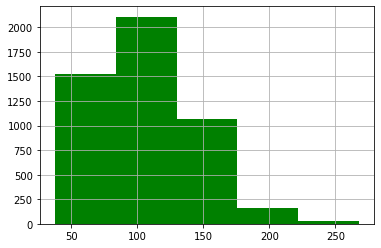

In [48]:
df1['Average_salary'].hist(bins=5, color='green')

Histrogram plot with 'seaborn':

In [49]:
import seaborn as sns

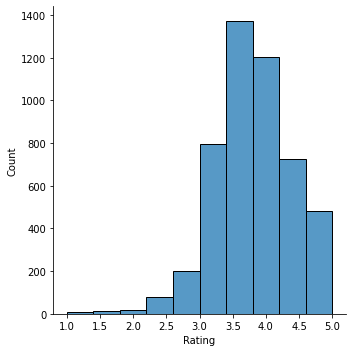

In [57]:
sns.displot(x='Rating', data=cleaned_df , bins=10)

<Axes: xlabel='Job Title', ylabel='count'>

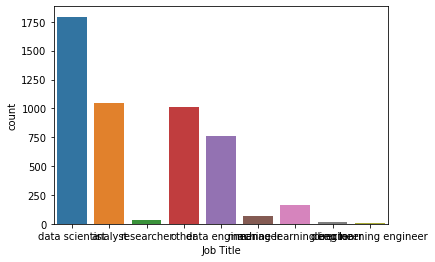

In [58]:
sns.countplot(x='Job Title', data=cleaned_df)

In [52]:
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'analyst'),
  Text(2, 0, 'researcher'),
  Text(3, 0, 'other'),
  Text(4, 0, 'data engineer'),
  Text(5, 0, 'manager'),
  Text(6, 0, 'machine learning engineer'),
  Text(7, 0, 'director'),
  Text(8, 0, 'deep learning engineer')])

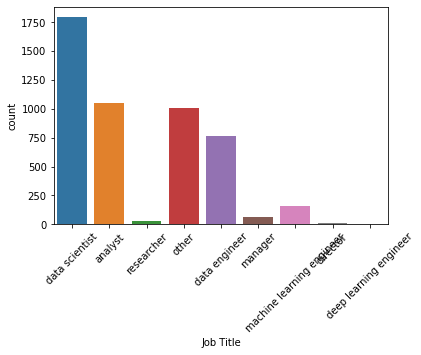

In [59]:
sns.countplot(x='Job Title', data=cleaned_df)
# asamiye nemodare x ro 45 darage taghir mide ke betonim title ro bebinim
plt.xticks(rotation = 45)

<Axes: xlabel='Rating'>

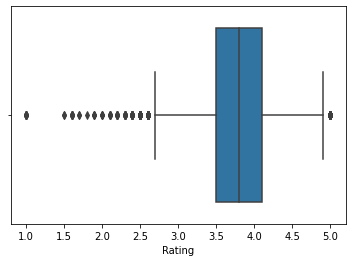

In [61]:
sns.boxplot(x='Rating', data=cleaned_df)

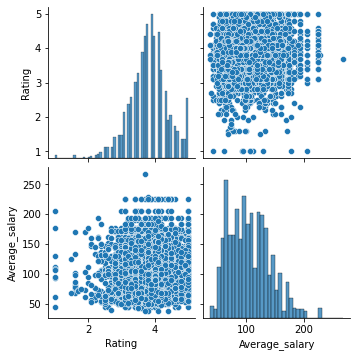

In [55]:
sns.pairplot(cleaned_df)

<Axes: xlabel='Rating', ylabel='Average_salary'>

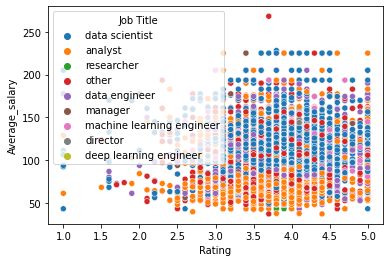

In [60]:
sns.scatterplot(x='Rating', y='Average_salary', data = cleaned_df , hue='Job Title')

# Feature Engineering:

For Machine Learning Algorithms to be able to use our data, we must ensure that all values are numerical
and there are no empty columns, as these algorithms are mathematical and can only process numbers, not objects


for the objects in the dataframe(ex, Job Title) we're going to assign a code to that with get_dummies
with following code the specific code will be assigned to JOB TITLE columns.


In [87]:
preprocessed_df = pd.get_dummies(cleaned_df , columns=['Job Title', 'State'])

In [88]:
preprocessed_df

,Rating,Average_salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
0,3.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.4,146.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,3.2,51.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5882,4.2,68.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5883,4.0,89.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5886,4.0,89.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


 we should separate our dependant and indepandant variables:
 
 x= dependant variable

we will drop the dependant variable which is our average salary  and put all of other variables in to 'x' and put averge salary which is our dependant variable into 'y'



In [89]:
x = preprocessed_df.drop(columns = 'Average_salary')

In [90]:
y = preprocessed_df['Average_salary']

# Modeling:

 Then we devide our dataset into 2 categories, Training set and testing set with scikitlearn library
to get the same random result we set the random_state 101.

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4 , random_state = 101)

In [122]:
lr = LinearRegression()

In [123]:
lr.fit(x_train,y_train)

LinearRegression()

In [124]:
# print the intercept(b0)
print(lr.intercept_)

-184086287434129.1


In [125]:
# print the coefficients(b1, b2, ...)
print(lr.coef_)

[ 2.18869742e+00 -2.64313155e+14 -2.64313155e+14 -2.64313155e+14
 -2.64313155e+14 -2.64313155e+14 -2.64313155e+14 -2.64313155e+14
 -2.64313155e+14 -2.64313155e+14  4.48399442e+14  4.48399442e+14
  4.48399442e+14  4.48399442e+14  4.48399442e+14  4.48399442e+14
  4.48399442e+14 -3.07129938e+13  4.48399442e+14  4.48399442e+14
  4.48399442e+14  4.48399442e+14  4.48399442e+14  4.48399442e+14
 -2.06035443e+12  4.48399442e+14  4.48399442e+14 -1.27453180e+12
  4.48399442e+14  4.48399442e+14  4.48399442e+14  4.48399442e+14
  4.48399442e+14  4.48399442e+14]


Now we want to test the model. we give the x_test to the model and compare the result to y and 
y_test

In [126]:
# Prediction
predictions = lr.predict(x_test)
predictions

array([ 95.46875, 128.5625 ,  85.65625, ...,  88.625  ,  83.125  ,
        94.28125])

In [127]:
y_test

3761    131.5
2249    124.0
4581    119.0
4635     81.0
3107    159.5
        ...  
1648     68.5
573     109.0
2000     73.0
5619     91.5
2733     61.5
Name: Average_salary, Length: 1958, dtype: float64

we're going to substract the prediction values by model from y_test to see whether or model is good or not:


In [128]:
residual = predictions - y_test

In [129]:
residual

3761   -36.03125
2249     4.56250
4581   -33.34375
4635     4.21875
3107   -35.50000
          ...   
1648    19.15625
573     24.59375
2000    15.62500
5619    -8.37500
2733    32.78125
Name: Average_salary, Length: 1958, dtype: float64

<Axes: xlabel='Average_salary'>

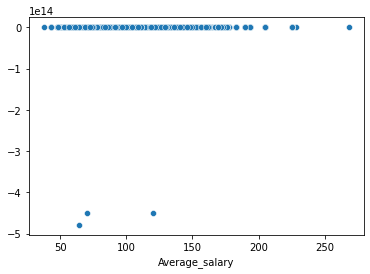

In [130]:
sns.scatterplot(x=y_test , y=predictions)


Mean Absolout Error(MAE):
    
is a matrix that we can see how accurate is our predicted model.

In [131]:
from sklearn import metrics

In [133]:
print('MAE:', mean_absolute_error(y_test, predictions))

MAE: 704415836278.7004


# Save the Model:

In [135]:
pickle.dump(lr, open('Salary_Estimater.pkl' , 'wb'))